In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
data = pd.read_csv('movies.csv')
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [251]:
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [253]:
data.isnull().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [254]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [255]:
# Cleaning data

data['rating'].fillna(data['rating'].mode()[0], inplace=True)
data.dropna(subset=['released'], inplace=True)
data['score'].fillna(data['score'].mean(), inplace=True)
data['votes'].fillna(data['votes'].mean(), inplace=True)
data['runtime'].fillna(data['runtime'].mean(), inplace=True)
data['budget'].fillna(data['budget'].mean(), inplace=True)
data['gross'].fillna(data['gross'].mean(), inplace=True)
data.dropna(subset=['writer'], inplace=True)
data.dropna(subset=['star'], inplace=True)
data.dropna(subset=['country'], inplace=True)
data.dropna(subset=['company'], inplace=True)

In [256]:
data.isnull().any()

name        False
rating      False
genre       False
year        False
released    False
score       False
votes       False
director    False
writer      False
star        False
country     False
budget      False
gross       False
company     False
runtime     False
dtype: bool

In [257]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [258]:
# Change data format

data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')
data['released'] = data['released'].astype(str)

In [259]:
data['released'] = data['released'].str.replace(r'\(.*\)', '', regex=True)
data['released']

0            June 13, 1980 
1             July 2, 1980 
2            June 20, 1980 
3             July 2, 1980 
4            July 25, 1980 
5              May 9, 1980 
6            June 20, 1980 
7        December 19, 1980 
8            June 19, 1981 
9             May 16, 1980 
10       December 17, 1980 
11        October 26, 1984 
12       December 12, 1980 
13      September 19, 1980 
14           July 25, 1980 
15         October 3, 1980 
16            May 16, 1980 
17       December 19, 1980 
18        February 8, 1980 
19       December 12, 1980 
20       February 15, 1980 
21          April 24, 1981 
22          August 1, 1980 
23          August 8, 1980 
24            June 6, 1980 
25       December 25, 1980 
26          March 21, 1980 
27          August 1, 1980 
28           June 20, 1980 
29        February 1, 1980 
30      September 26, 1980 
31           July 18, 1980 
32         August 15, 1980 
33          April 24, 1981 
34       December 19, 1980 
35        October 10

In [260]:
data['year_correct'] = data['released'].str.extract(r'(\d{4})')
data[['released', 'year_correct', 'year']].head()

,released,year_correct,year
0,"June 13, 1980",1980,1980
1,"July 2, 1980",1980,1980
2,"June 20, 1980",1980,1980
3,"July 2, 1980",1980,1980
4,"July 25, 1980",1980,1980


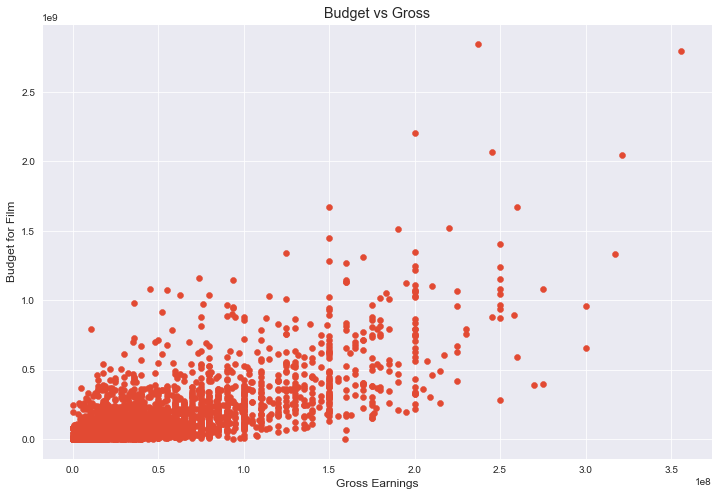

In [261]:
# Budget high correlation
# Scatter plot with budget vs gross

plt.scatter(x=data['budget'], y=data['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

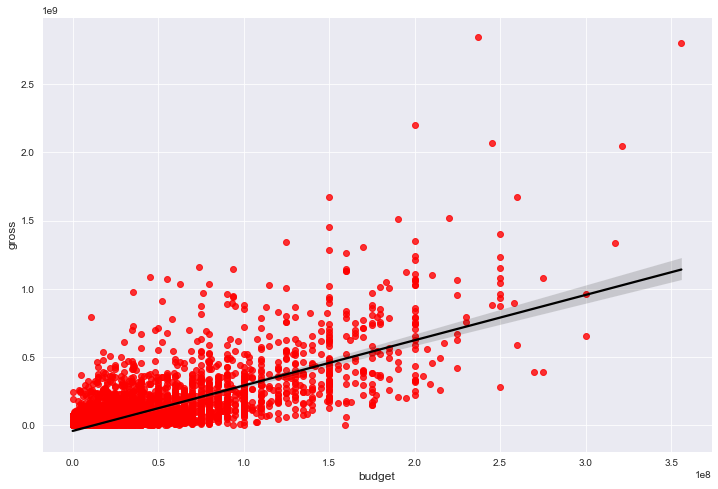

In [262]:
sns.regplot(x='budget', y='gross', data=data, scatter_kws={'color': 'red'}, line_kws={"color": "black"})

In [263]:
# Looking at Correlation

data.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097902,0.223077,0.266659,0.252283,0.119897
score,0.097902,1.000000,0.409468,0.064230,0.182881,0.399905
votes,0.223077,0.409468,1.000000,0.420950,0.628735,0.308888
budget,0.266659,0.064230,0.420950,1.000000,0.711629,0.264982
gross,0.252283,0.182881,0.628735,0.711629,1.000000,0.241287
runtime,0.119897,0.399905,0.308888,0.264982,0.241287,1.000000


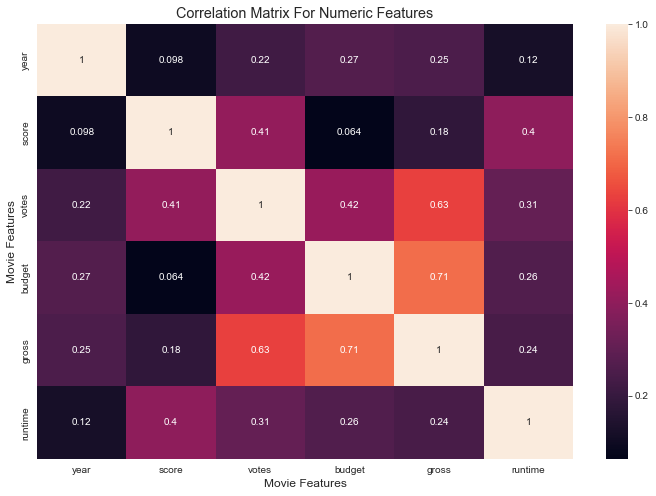

In [264]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [265]:
# Company high correlation

category_data = data.copy()

for col in data.columns:
    if category_data[col].dtype == 'object' :
        category_data[col] = category_data[col].astype('category').cat.codes


category_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6569,6,6,1980,1508,8.4,927000.0,2579,4002,1041,54,19000000,46998772,2314,146.0,0
1,5558,6,1,1980,1309,5.8,65000.0,2262,1629,325,55,4500000,58853106,727,104.0,0
2,5129,4,0,1980,1566,8.7,1200000.0,1109,2559,1737,55,18000000,538375067,1535,124.0,0
3,285,4,4,1980,1309,7.7,221000.0,1297,1995,2238,55,3500000,83453539,1807,88.0,0
4,1026,6,4,1980,1358,7.3,108000.0,1052,518,408,55,6000000,39846344,1772,98.0,0


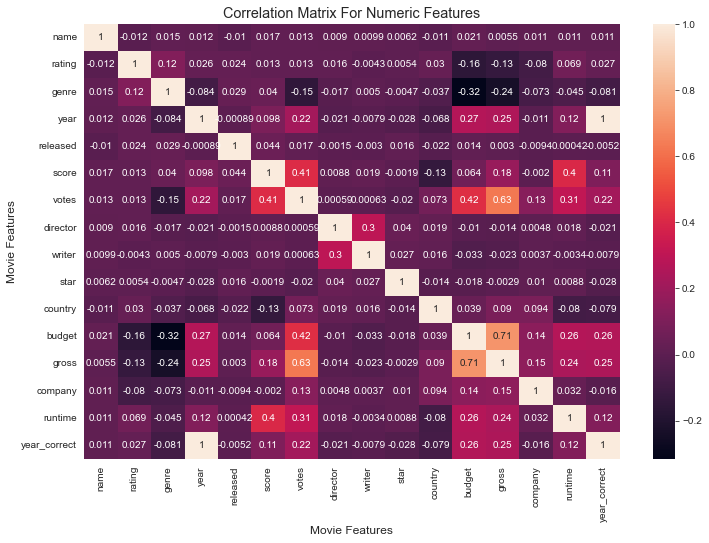

In [266]:
correlation_matrix1 = category_data.corr()
sns.heatmap(correlation_matrix1, annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [267]:
corr_pairs = correlation_matrix1.unstack()
sort_pairs = corr_pairs.sort_values()
sort_pairs

genre         budget         -0.315875
budget        genre          -0.315875
genre         gross          -0.237839
gross         genre          -0.237839
rating        budget         -0.156938
budget        rating         -0.156938
votes         genre          -0.150176
genre         votes          -0.150176
country       score          -0.133201
score         country        -0.133201
gross         rating         -0.130502
rating        gross          -0.130502
year          genre          -0.084395
genre         year           -0.084395
year_correct  genre          -0.080633
genre         year_correct   -0.080633
rating        company        -0.080379
company       rating         -0.080379
country       runtime        -0.079977
runtime       country        -0.079977
country       year_correct   -0.078785
year_correct  country        -0.078785
genre         company        -0.072904
company       genre          -0.072904
year          country        -0.068140
country       year       

In [268]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

votes         gross           0.628735
gross         votes           0.628735
              budget          0.711629
budget        gross           0.711629
year          year_correct    0.997404
year_correct  year            0.997404
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [269]:
# Results:
# Budget and gross have high correlation But Company name has low correlation And we realize there is correlation between vote and gross.